In [1]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os
import glob
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [68]:
sample_ds = tf.keras.utils.image_dataset_from_directory(
  'train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(48,48),
  batch_size=32)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [69]:
class_names = sample_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


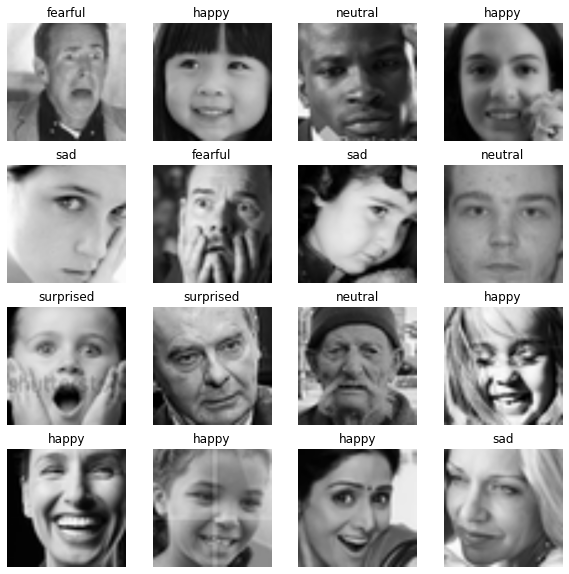

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
"Kindly un-hash the below codes and run in your directory/folder"

#location_dir='xx\\Kaggle Dataset\\Emotion_Detection\\train'

'Kindly un-hash the below codes and run in your directory/folder'

In [6]:
"Kindly un-hash the below codes and run in your directory/folder"

import pathlib
#data_dir = pathlib.Path(location_dir)
#data_dir

In [8]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x0000021075255890>

In [9]:
list(data_dir.glob('*/*.jpg'))[:2]

[]

In [10]:
image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)

28709


In [7]:
"Kindly un-hash the below codes and run in your directory/folder"
#Happy = list(data_dir.glob('Happy/*'))
#Happy[:5]

'Kindly un-hash the below codes and run in your directory/folder'

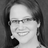

In [12]:
PIL.Image.open(str(Happy[0]))

In [24]:
emotions_images_dict = {
    'Angry': list(data_dir.glob('angry/*')),
    'Disgusted': list(data_dir.glob('disgusted/*')),
    'Fearful': list(data_dir.glob('fearful/*')),
    'Happy': list(data_dir.glob('happy/*')),
    'Neutral':list(data_dir.glob('neutral/*')),
    'Sad':list(data_dir.glob('sad/*')),
    'Surprised':list(data_dir.glob('surprised/*'))
}

In [25]:
emotions_labels_dict={
    'Angry':0,
    'Disgusted':1,
    'Fearful':2,
    'Happy':3,
    'Neutral':4,
    'Sad':5,
    'Surprised':6    
}

In [8]:
#emotions_images_dict['Happy'][30]

In [16]:
img=cv2.imread(str(emotions_images_dict['Happy'][30]))

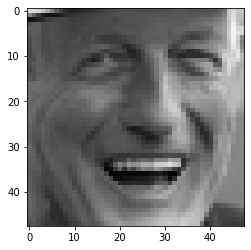

In [17]:
plt.imshow(img)

In [18]:
img.shape

(48, 48, 3)

In [44]:
for emotion_name, images in emotions_images_dict.items():
    print (emotion_name)
    print(len(images))

Angry
3995
Disgusted
436
Fearful
4097
Happy
7215
Neutral
4965
Sad
4830
Surprised
3171


In [48]:
X, y = [], []

for emotion_name, images in emotions_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        X.append(img)
        y.append(emotions_labels_dict[emotion_name])

In [49]:
X[9]

array([[[109, 109, 109],
        [101, 101, 101],
        [ 85,  85,  85],
        ...,
        [118, 118, 118],
        [112, 112, 112],
        [133, 133, 133]],

       [[123, 123, 123],
        [ 92,  92,  92],
        [ 78,  78,  78],
        ...,
        [109, 109, 109],
        [122, 122, 122],
        [148, 148, 148]],

       [[118, 118, 118],
        [ 63,  63,  63],
        [118, 118, 118],
        ...,
        [136, 136, 136],
        [111, 111, 111],
        [164, 164, 164]],

       ...,

       [[ 82,  82,  82],
        [ 75,  75,  75],
        [ 89,  89,  89],
        ...,
        [ 77,  77,  77],
        [ 94,  94,  94],
        [ 83,  83,  83]],

       [[ 93,  93,  93],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [ 58,  58,  58],
        [ 78,  78,  78],
        [ 90,  90,  90]],

       [[ 88,  88,  88],
        [111, 111, 111],
        [ 86,  86,  86],
        ...,
        [ 57,  57,  57],
        [ 84,  84,  84],
        [ 60,  60,  60]]

In [50]:
X = np.array(X)
y = np.array(y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [52]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [115]:
num_classes = 7

model = Sequential([
  layers.Conv2D(50, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(30, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(10, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)   

Epoch 1/5
673/673 [==============================] - 36s 52ms/step - loss: 1.7256 - accuracy: 0.3061
Epoch 2/5
673/673 [==============================] - 37s 55ms/step - loss: 1.5240 - accuracy: 0.4128
Epoch 3/5
673/673 [==============================] - 39s 58ms/step - loss: 1.4201 - accuracy: 0.4538
Epoch 4/5
673/673 [==============================] - 38s 57ms/step - loss: 1.3486 - accuracy: 0.4833
Epoch 5/5
673/673 [==============================] - 38s 57ms/step - loss: 1.2740 - accuracy: 0.5127


In [116]:
model.evaluate(X_test_scaled,y_test)

225/225 [==============================] - 3s 13ms/step - loss: 1.3510 - accuracy: 0.4752


[1.3509865999221802, 0.4752019941806793]

In [9]:
"So here we see that the model during training sample gave 51% accuracy. During evaluation the model gave 47% accuracy."

'So here we see that the model during training sample gave 51% accuracy. During evaluation the model gave 47% accuracy.'

In [99]:
predictions = model.predict (X_test_scaled)
predictions

225/225 [==============================] - 3s 14ms/step


array([[-0.8707275 , -0.84710234, -2.2144153 , ..., -1.6528671 ,
        -1.4810512 , -0.04800181],
       [-0.7788881 , -4.026628  ,  0.07755773, ...,  2.4132788 ,
         0.9627446 , -1.4219323 ],
       [-0.4286551 , -3.5900154 ,  0.32124454, ...,  1.7187644 ,
         1.8696065 , -4.1994734 ],
       ...,
       [ 0.6863761 , -3.8905427 ,  2.4655142 , ..., -2.6275384 ,
         1.3718412 ,  3.5139961 ],
       [ 0.15751246,  0.6232044 , -0.71223986, ...,  0.2802338 ,
        -0.2784471 , -5.2036476 ],
       [ 1.6136776 , -5.5637364 ,  1.1266001 , ..., -0.04910217,
         0.26736927,  2.3456264 ]], dtype=float32)

In [100]:
score=tf.nn.softmax(predictions[10])
score 

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.20499541, 0.00701074, 0.06047064, 0.25479057, 0.33596048,
       0.08258566, 0.05418645], dtype=float32)>

In [101]:
np.argmax(score)

4

In [102]:
y_test[10]

5

In [103]:
np.argmax(tf.nn.softmax(predictions[66]))

3

In [104]:
y_test[66]

3

In [105]:
np.argmax(tf.nn.softmax(predictions[97]))

4

In [106]:
y_test[97]

4

In [107]:
np.argmax(tf.nn.softmax(predictions[81]))

4

In [108]:
y_test[81]

3

In [10]:
"So we see that the some results are and some are not. We experiment with data augmentation technique to check the performance"

'So we see that the some results are and some are not. We experiment with data augmentation technique to check the performance'

In [117]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [118]:
"Training the model using data augmentation and a drop out layer"

'Training the model using data augmentation and a drop out layer'

In [119]:
num_classes = 7

model = Sequential([
    data_augmentation,
    layers.Conv2D(50, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(30, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(10, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)   

Epoch 1/5
673/673 [==============================] - 40s 55ms/step - loss: 1.8052 - accuracy: 0.2495
Epoch 2/5
673/673 [==============================] - 42s 62ms/step - loss: 1.7345 - accuracy: 0.2879
Epoch 3/5
673/673 [==============================] - 42s 63ms/step - loss: 1.6851 - accuracy: 0.3233
Epoch 4/5
673/673 [==============================] - 44s 66ms/step - loss: 1.6171 - accuracy: 0.3637
Epoch 5/5
673/673 [==============================] - 45s 66ms/step - loss: 1.5667 - accuracy: 0.3851


In [120]:
model.evaluate(X_test_scaled,y_test)

225/225 [==============================] - 3s 13ms/step - loss: 2.0985 - accuracy: 0.2448


[2.0984745025634766, 0.2447756975889206]